# road speed (mean) ssa

In [13]:
library(ggplot2)
library(viridis)
library(zoo)
library(Rssa)

In [14]:
plot.wcor <- function(w, pallete="viridis") {
    stopifnot(pallete %in% c("viridis", "magma", "plasma", "inferno", "cividis"))
    my_melt <- function(x) {
      row_names <- rep(rownames(x), ncol(x))
      col_names <- unlist(lapply(colnames(x), function(cn) rep(cn, nrow(x))))
      melt_vals <- as.vector(x) # R does this in column order.
      data.frame(row=row_names, col=col_names, val=melt_vals)
    }              
    w <- my_melt(w)
    groups <- 1:nrow(w)
    g <- ggplot(w, aes(x=factor(row, levels=paste0("F", groups)), 
                       y=factor(col, levels=paste0("F", groups))))
    g <- g + geom_tile(aes(fill=val), colour="#000000", size=0.1, show.legend=F)
    g <- g + scale_fill_viridis(option=pallete)
    g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
}

In [15]:
x <- read.csv("../data/highways_england/all_london/speed_mean_2016-2018.csv")
#x <- head(x, -31)
tail(x, 31)

,X,X0,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
867,2018-09-23,64.42,64.70,64.92,64.63,64.23,64.21,64.28,64.30,63.81,⋯,64.89,65.11,65.44,65.62,65.56,65.08,64.67,64.75,65.03,64.44
868,2018-09-24,64.10,64.05,64.03,63.46,63.12,63.31,62.69,62.87,62.54,⋯,63.91,62.79,61.81,61.25,61.05,60.61,60.66,61.16,60.55,59.78
869,2018-09-25,59.80,60.00,60.20,59.86,59.35,59.14,59.51,59.26,59.14,⋯,64.12,63.64,62.45,61.32,61.09,60.91,60.23,60.57,61.03,60.29
870,2018-09-26,60.08,59.57,59.36,59.36,59.20,58.76,58.64,58.26,58.65,⋯,64.44,63.91,62.45,61.35,60.74,60.34,59.79,59.33,59.07,58.91
871,2018-09-27,59.26,59.22,58.77,58.27,58.51,57.50,57.99,57.92,58.01,⋯,64.10,63.27,62.35,61.83,60.93,60.50,60.31,60.19,60.10,59.61
872,2018-09-28,59.29,59.57,59.26,58.62,59.27,59.06,59.15,58.79,58.86,⋯,64.66,64.49,64.60,64.81,64.45,64.08,63.38,62.65,62.61,61.49
873,2018-09-29,61.34,60.96,61.01,60.61,60.79,61.25,60.68,60.26,60.37,⋯,64.60,64.23,62.48,62.80,63.19,63.07,63.09,63.33,63.31,63.62
874,2018-09-30,63.64,63.91,63.72,63.55,63.51,63.50,62.90,62.83,63.55,⋯,64.78,65.02,65.36,65.09,64.77,64.82,65.13,65.22,65.20,64.86
875,2018-10-01,64.51,64.09,63.92,63.77,64.01,63.08,62.98,61.44,61.09,⋯,62.27,61.81,61.37,61.23,61.38,61.02,60.87,61.14,60.23,58.82
876,2018-10-04,59.30,58.37,58.38,58.16,58.39,58.53,58.75,57.94,58.09,⋯,64.14,63.48,62.77,62.13,62.16,61.52,61.75,61.69,61.13,60.91


In [16]:
# lots of missing days
date.range <- as.character(seq(from=as.Date("2016-01-01"), to=as.Date("2018-10-31"), by=1))
date.range[!date.range %in% x$X]

[1] "2016-03-16" "2016-03-27" "2016-04-06" "2016-04-07" "2016-04-08"
  [6] "2016-04-09" "2016-04-10" "2016-04-11" "2016-05-05" "2016-05-06"
 [11] "2016-05-07" "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11"
 [16] "2016-05-13" "2016-05-14" "2016-05-15" "2016-05-19" "2016-06-01"
 [21] "2016-06-02" "2016-06-08" "2016-06-09" "2016-06-14" "2016-06-16"
 [26] "2016-07-18" "2016-07-20" "2016-07-21" "2016-08-01" "2016-08-10"
 [31] "2016-08-15" "2016-08-16" "2016-08-17" "2016-08-18" "2016-08-19"
 [36] "2016-09-04" "2016-09-05" "2016-09-06" "2016-09-07" "2016-09-08"
 [41] "2016-09-15" "2016-09-16" "2016-10-07" "2016-10-08" "2016-10-10"
 [46] "2016-10-11" "2016-10-17" "2016-10-18" "2016-10-19" "2016-10-31"
 [51] "2016-11-21" "2016-11-29" "2016-12-06" "2016-12-14" "2016-12-15"
 [56] "2016-12-16" "2016-12-17" "2016-12-18" "2016-12-19" "2016-12-20"
 [61] "2017-01-03" "2017-01-04" "2017-01-05" "2017-01-21" "2017-02-14"
 [66] "2017-03-08" "2017-03-11" "2017-03-26" "2017-03-30" "2017-03-31"
 [71] "2017-04-07" "2017-04-11" "2017-05-04" "2017-05-12" "2017-05-13"
 [76] "2017-05-14" "2017-05-15" "2017-05-17" "2017-05-18" "2017-05-19"
 [81] "2017-05-20" "2017-05-21" "2017-05-22" "2017-05-23" "2017-05-26"
 [86] "2017-05-27" "2017-07-02" "2017-07-06" "2017-07-07" "2017-07-08"
 [91] "2017-07-09" "2017-07-10" "2017-07-13" "2017-07-14" "2017-07-15"
 [96] "2017-07-16" "2017-07-17" "2017-07-18" "2017-07-19" "2017-07-21"
[101] "2017-07-22" "2017-07-23" "2017-07-24" "2017-07-28" "2017-07-29"
[106] "2017-07-30" "2017-07-31" "2017-08-07" "2017-08-08" "2017-08-15"
[111] "2017-08-16" "2017-08-24" "2017-10-17" "2017-11-16" "2017-11-23"
[116] "2017-11-24" "2017-11-25" "2018-01-12" "2018-02-23" "2018-03-25"
[121] "2018-04-09" "2018-04-10" "2018-05-09" "2018-06-24" "2018-06-25"
[126] "2018-08-12" "2018-08-13" "2018-08-14" "2018-08-30" "2018-09-05"
[131] "2018-10-02" "2018-10-03" "2018-10-07" "2018-10-08" "2018-10-14"
[136] "2018-10-15" "2018-10-16" "2018-10-17"

In [17]:
lala <- merge(x, data.frame(d=date.range), by.x="X", by.y="d", all.y=T)
lala$X <- as.Date(as.character(lala$X))
lala <- lala[order(lala$X), ]
lala <- cbind(dow=weekdays(lala$X), lala)
lala[lala$X == "2018-10-02", ]
lala[lala$X == "2018-10-04", ]
nrow(lala)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
1028,Tuesday,2018-10-02,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
876,Thursday,2018-10-04,59.3,58.37,58.38,58.16,58.39,58.53,58.75,57.94,⋯,64.14,63.48,62.77,62.13,62.16,61.52,61.75,61.69,61.13,60.91


[1] 1035

In [18]:
meh <- data.frame()
for(weekday in unique(lala$dow)) {
    lala.wd <- lala[lala$dow == weekday, ]
    lala.wd <- apply(lala.wd, 2, na.locf)
    meh <- rbind(meh, lala.wd)
}
meh$X <- as.Date(as.character(meh$X))
lala <- meh[order(meh$X), ]
tail(lala)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
892,Friday,2018-10-26,56.89,57.49,57.31,56.34,56.49,57.26,57.14,56.78,⋯,62.83,63.91,64.38,64.41,64.35,64.13,63.66,63.16,62.42,61.22
893,Saturday,2018-10-27,60.17,59.50,59.28,59.02,58.41,58.61,58.25,57.41,⋯,63.44,63.10,63.22,63.27,63.78,63.88,64.09,64.18,63.95,64.26
894,Sunday,2018-10-28,64.47,64.34,64.45,64.75,64.49,64.79,64.39,63.97,⋯,64.59,64.98,65.12,65.10,65.25,65.06,64.95,65.15,65.19,64.71
895,Monday,2018-10-29,64.77,64.20,64.10,63.09,62.87,62.73,62.33,62.37,⋯,63.97,63.91,63.50,63.09,62.73,61.08,59.37,59.23,59.15,59.87
896,Tuesday,2018-10-30,59.99,60.02,59.08,58.29,58.14,58.00,57.37,57.68,⋯,64.12,63.36,62.41,62.02,61.16,59.24,57.76,57.28,58.56,58.99
897,Wednesday,2018-10-31,58.97,58.74,58.14,57.55,57.24,56.89,57.05,56.65,⋯,63.62,63.72,63.23,62.92,62.66,62.03,61.97,60.71,60.98,60.30


In [19]:
lala[lala$X == "2018-10-02", ]
lala[lala$X == "2018-10-04", ]

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
1028,Tuesday,2018-10-02,59.80,60.00,60.20,59.86,59.35,59.14,59.51,59.26,⋯,64.12,63.64,62.45,61.32,61.09,60.91,60.23,60.57,61.03,60.29


,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
876,Thursday,2018-10-04,59.30,58.37,58.38,58.16,58.39,58.53,58.75,57.94,⋯,64.14,63.48,62.77,62.13,62.16,61.52,61.75,61.69,61.13,60.91


In [20]:
flatten <- function(df) as.vector(matrix(t(df[, -c(1, 2)]), ncol=1))

In [21]:
tail(lala, 10)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
888,Monday,2018-10-22,63.26,62.79,62.65,62.64,62.26,60.46,60.34,60.44,⋯,64.26,63.88,63.13,62.31,61.58,60.80,60.76,59.71,59.54,58.24
889,Tuesday,2018-10-23,58.91,59.00,59.27,58.93,58.82,58.87,58.18,57.90,⋯,63.88,63.49,62.72,61.69,60.50,60.03,58.84,59.55,59.98,59.45
890,Wednesday,2018-10-24,59.84,58.20,58.16,59.04,58.45,57.73,56.99,57.35,⋯,64.46,63.98,62.76,61.49,59.76,58.31,58.53,58.92,58.66,56.12
891,Thursday,2018-10-25,55.95,56.54,55.90,56.77,56.59,56.64,56.56,56.65,⋯,63.91,63.67,62.69,62.16,59.74,59.10,58.94,57.69,57.91,57.53
892,Friday,2018-10-26,56.89,57.49,57.31,56.34,56.49,57.26,57.14,56.78,⋯,62.83,63.91,64.38,64.41,64.35,64.13,63.66,63.16,62.42,61.22
893,Saturday,2018-10-27,60.17,59.50,59.28,59.02,58.41,58.61,58.25,57.41,⋯,63.44,63.10,63.22,63.27,63.78,63.88,64.09,64.18,63.95,64.26
894,Sunday,2018-10-28,64.47,64.34,64.45,64.75,64.49,64.79,64.39,63.97,⋯,64.59,64.98,65.12,65.10,65.25,65.06,64.95,65.15,65.19,64.71
895,Monday,2018-10-29,64.77,64.20,64.10,63.09,62.87,62.73,62.33,62.37,⋯,63.97,63.91,63.50,63.09,62.73,61.08,59.37,59.23,59.15,59.87
896,Tuesday,2018-10-30,59.99,60.02,59.08,58.29,58.14,58.00,57.37,57.68,⋯,64.12,63.36,62.41,62.02,61.16,59.24,57.76,57.28,58.56,58.99
897,Wednesday,2018-10-31,58.97,58.74,58.14,57.55,57.24,56.89,57.05,56.65,⋯,63.62,63.72,63.23,62.92,62.66,62.03,61.97,60.71,60.98,60.30


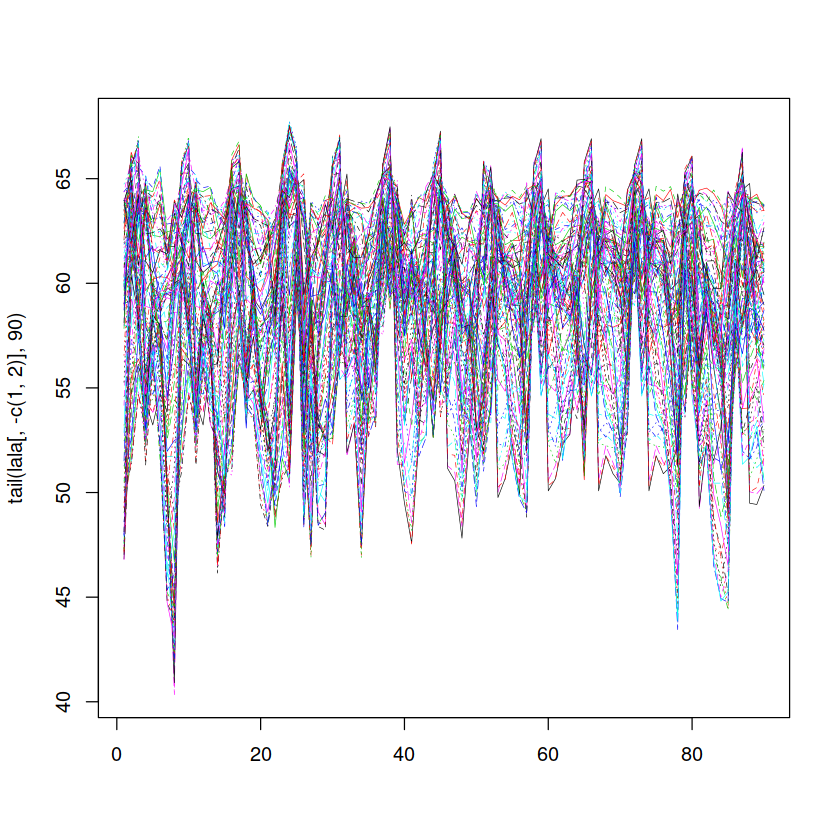

In [22]:
par(bg="white")
matplot(tail(lala[, -c(1,2)], 90), type="l", lwd=0.5)

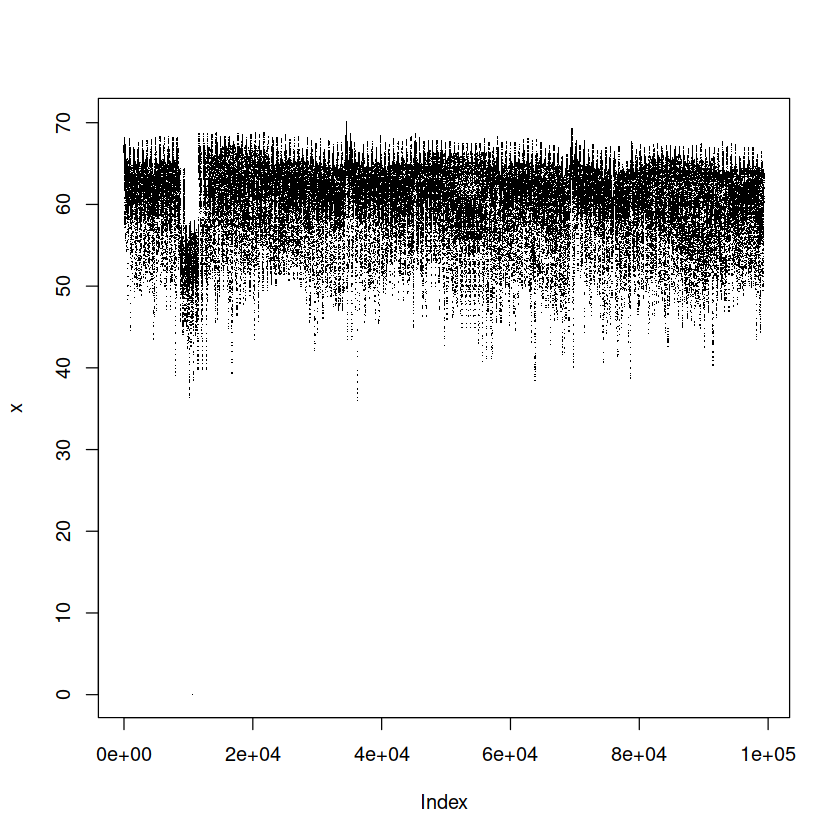

In [23]:
x <- as.numeric(flatten(lala))
#x <- as.vector(apply(lala[, -c(1,2)], 1, function(x) mean(as.numeric(x))))
#x <- head(x, -96*50)
plot(x, type="p", pch=".")

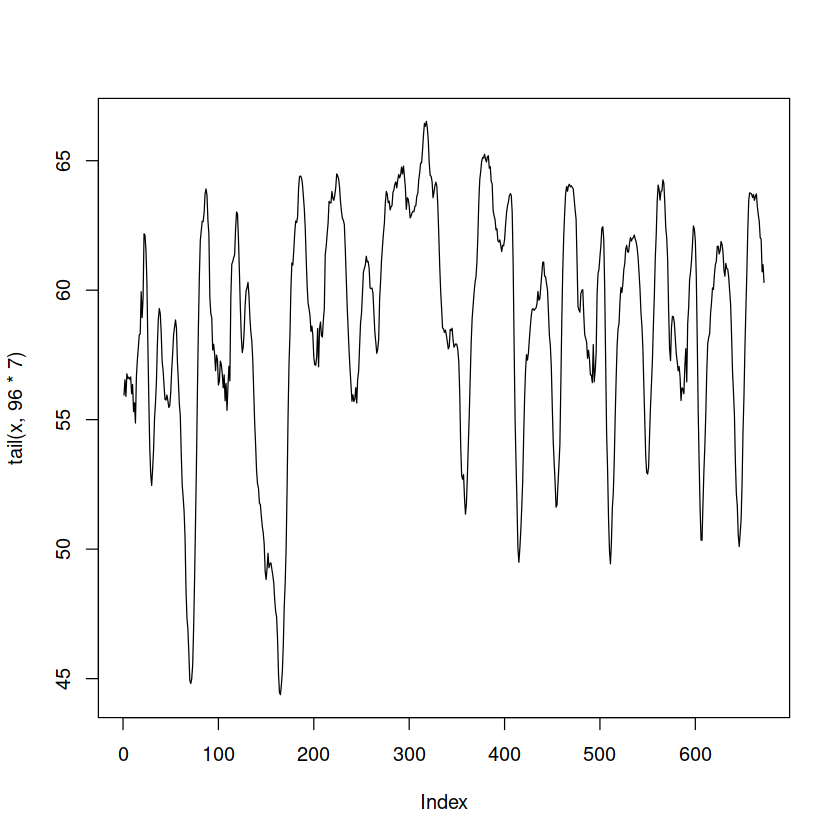

In [24]:
plot(tail(x, 96*7), type="l")

In [25]:
#m <- ssa(x, L=96*365)
m <- ssa(x)
m


Call:
ssa(x = x)

Series length: 99360,	Window length: 49680,	SVD method: nutrlan
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 19.71 MiB

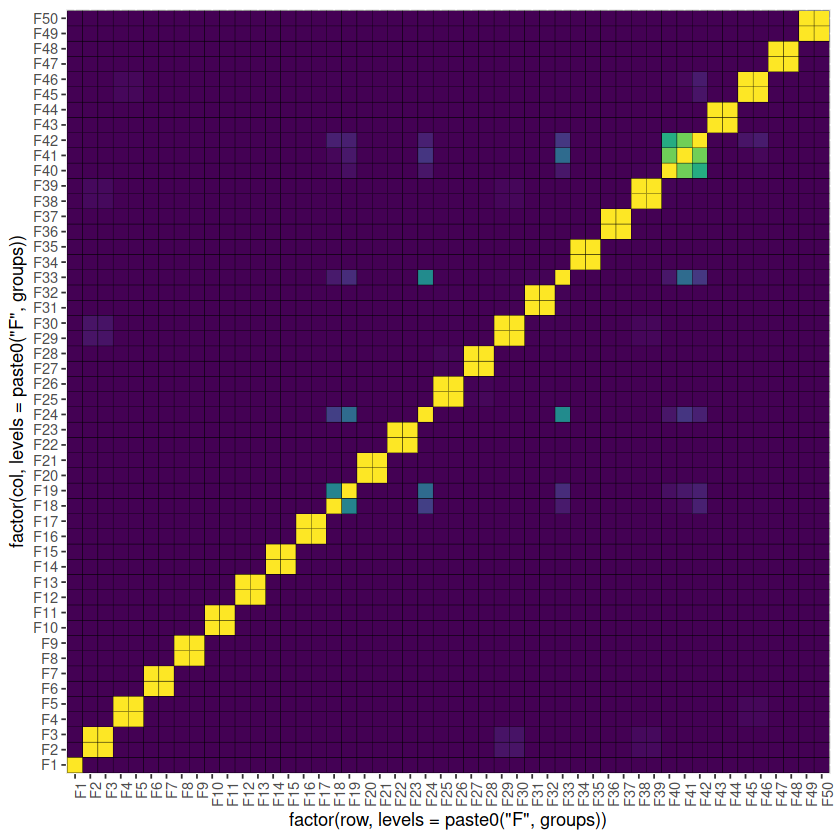

In [26]:
plot.wcor(wcor(m))

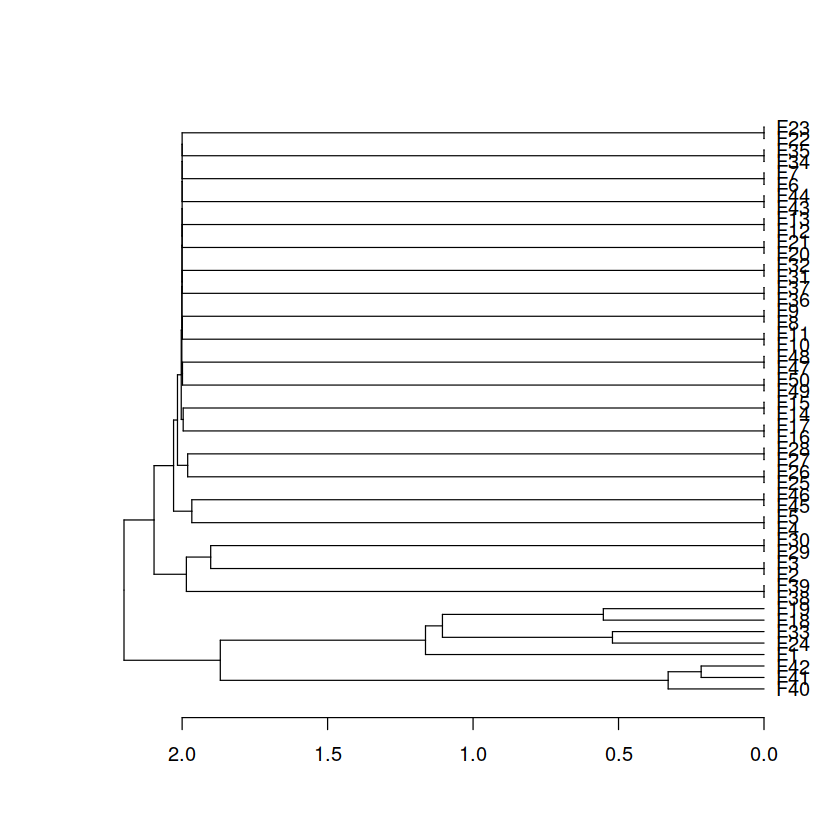

In [27]:
wc <- wcor(m)
wc <- wc[1:50, 1:50]
plot(as.dendrogram(hclust(1 - as.dist(wc), method="ward.D")), horiz=T)

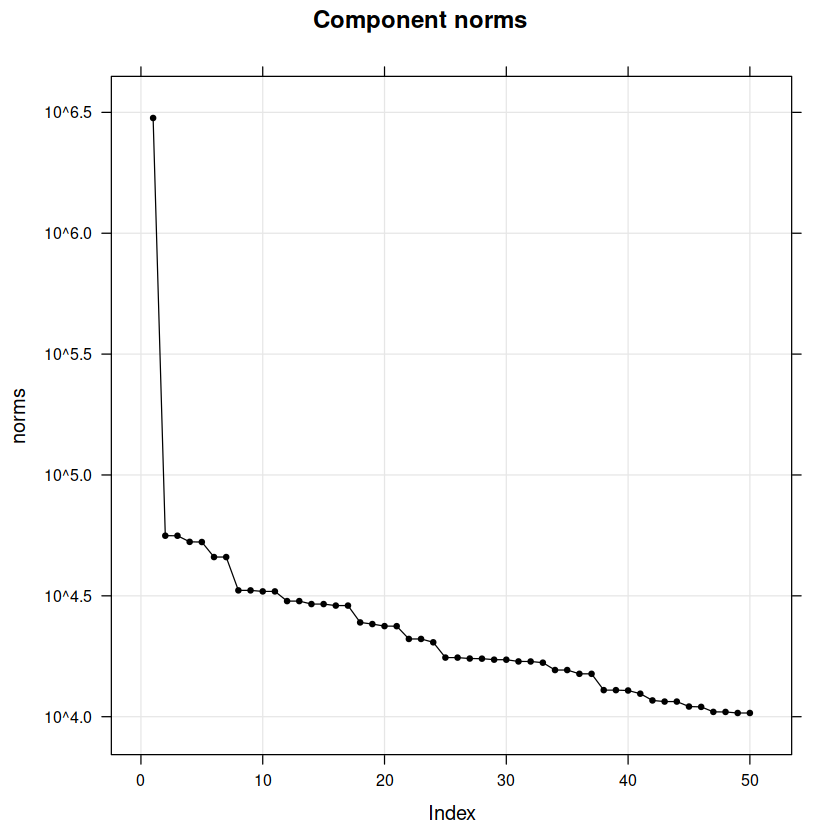

In [28]:
plot(m, type="values", col="black")

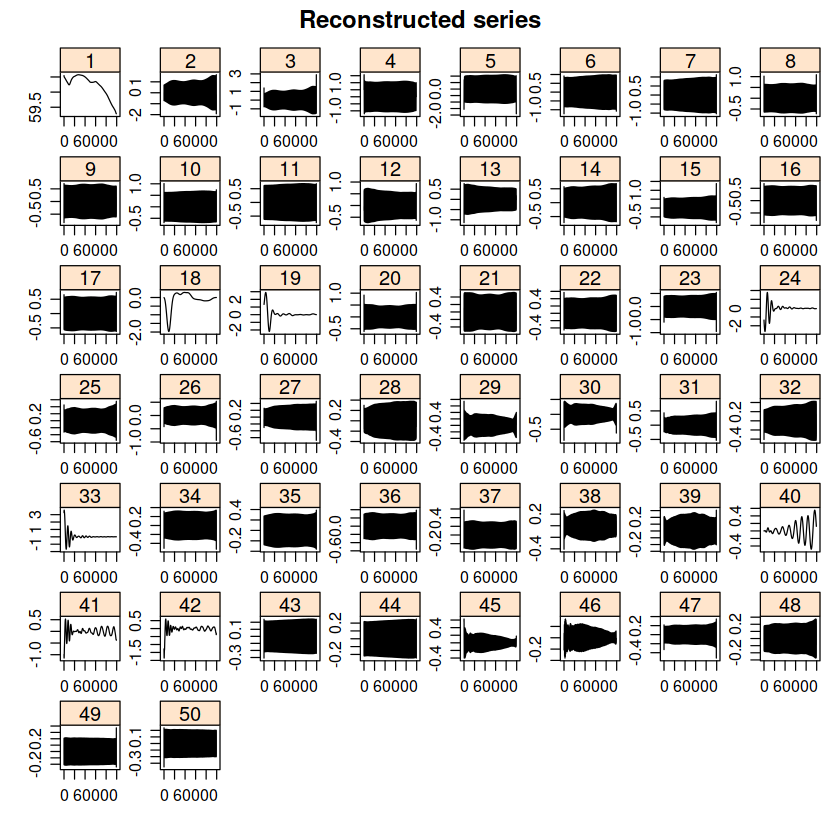

In [29]:
plot(m, type = "series", idx=1:50, col="black")

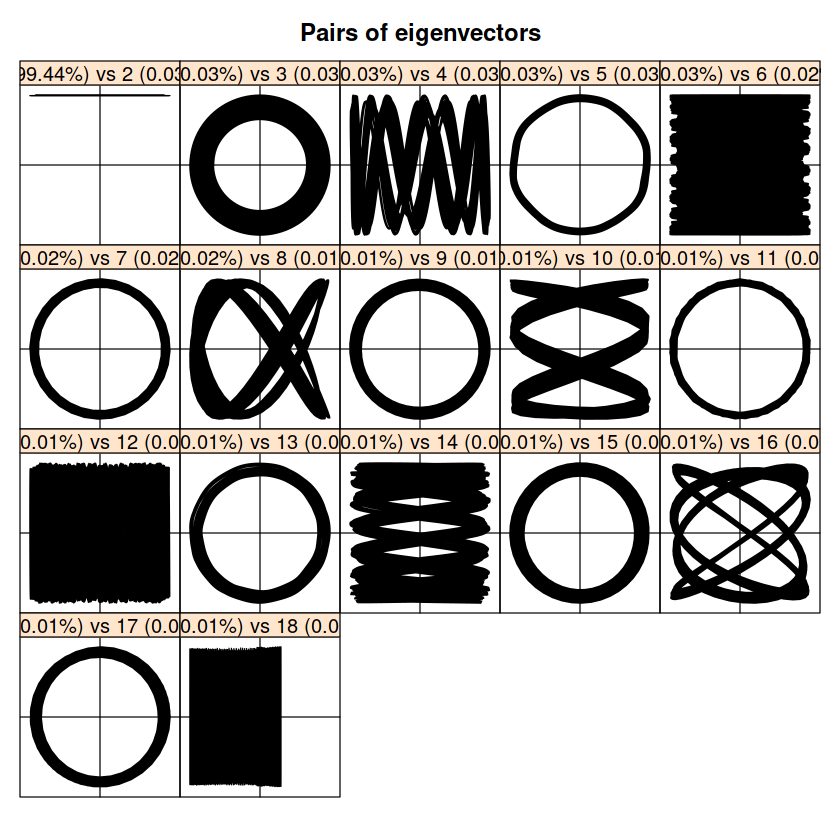

In [30]:
plot(m, type = "paired", col="black", idx=1:17)

In [32]:
recon <- reconstruct(m, groups = list("Trend" = 1, "p1" = c(2, 3), "p2" = c(4, 5), "p3"=c(6,7), "p4"=c(8,9), "p4"=c(10,11), "p5"=c(12,13), "p6"=c(14,15), "p7"=c(16,17)))

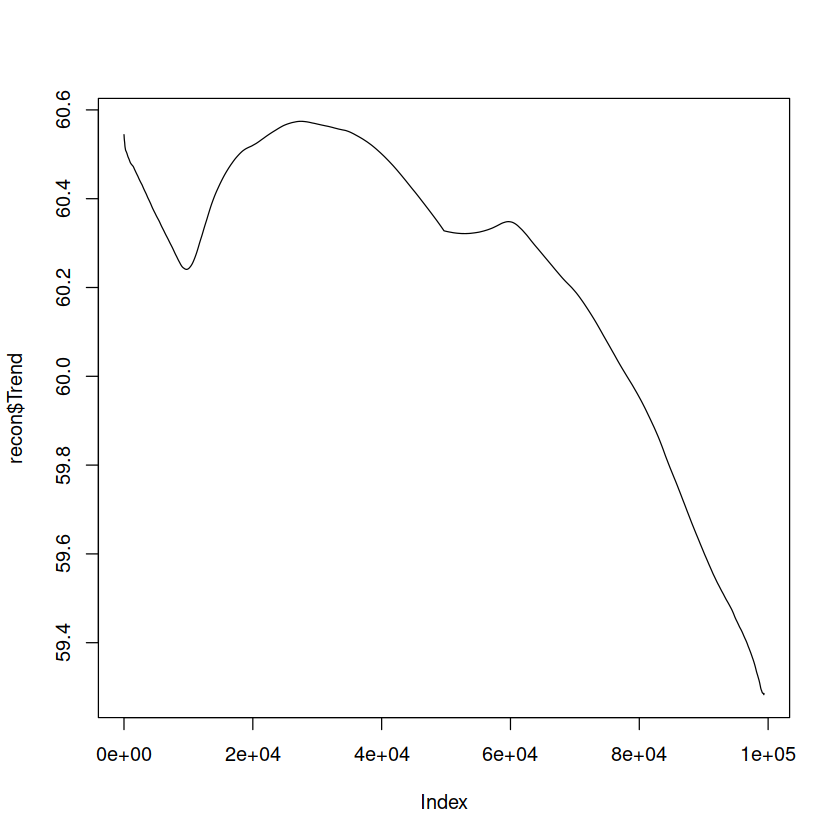

In [33]:
# trend has mixed in summer peak (good). probably not seperable because of drop at end and right in the middle.
plot(recon$Trend, type="l")

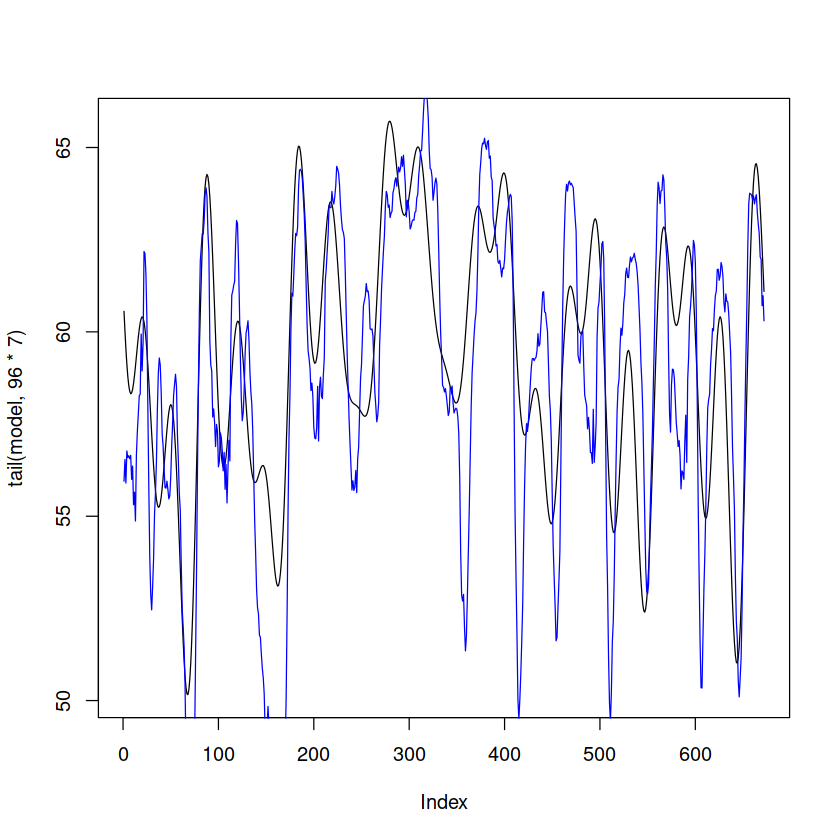

In [36]:
model <- with(recon, Trend+p1+p2+p3+p4+p5+p6+p7)
#model <- with(recon, Trend+p15)
plot(tail(model, 96*7), type="l")
lines(tail(x, 96*7), col="blue")

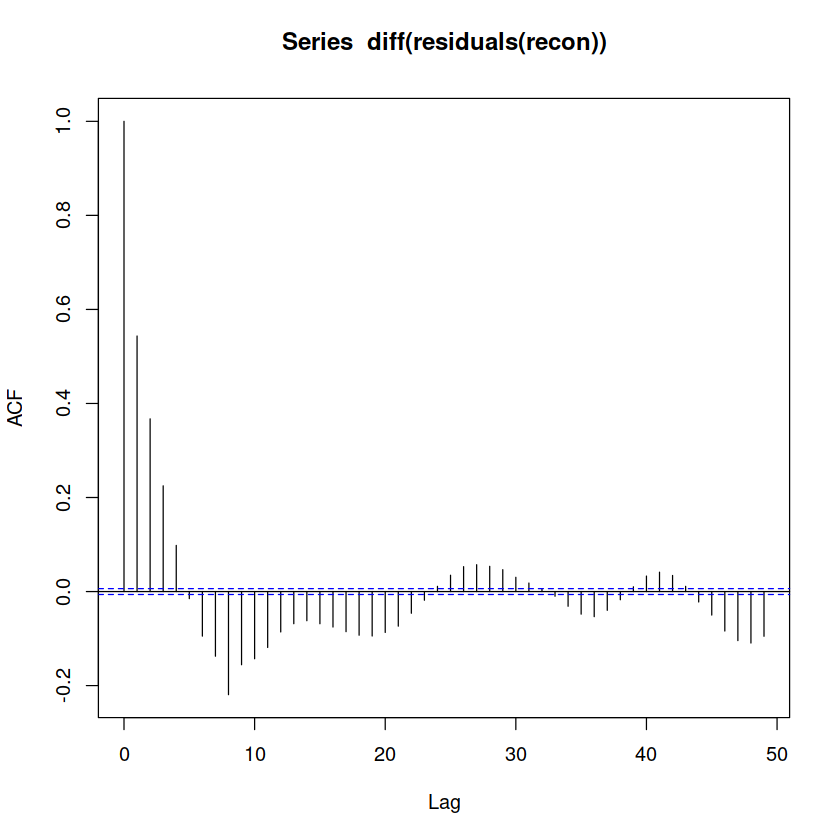

In [37]:
acf(diff(residuals(recon)))

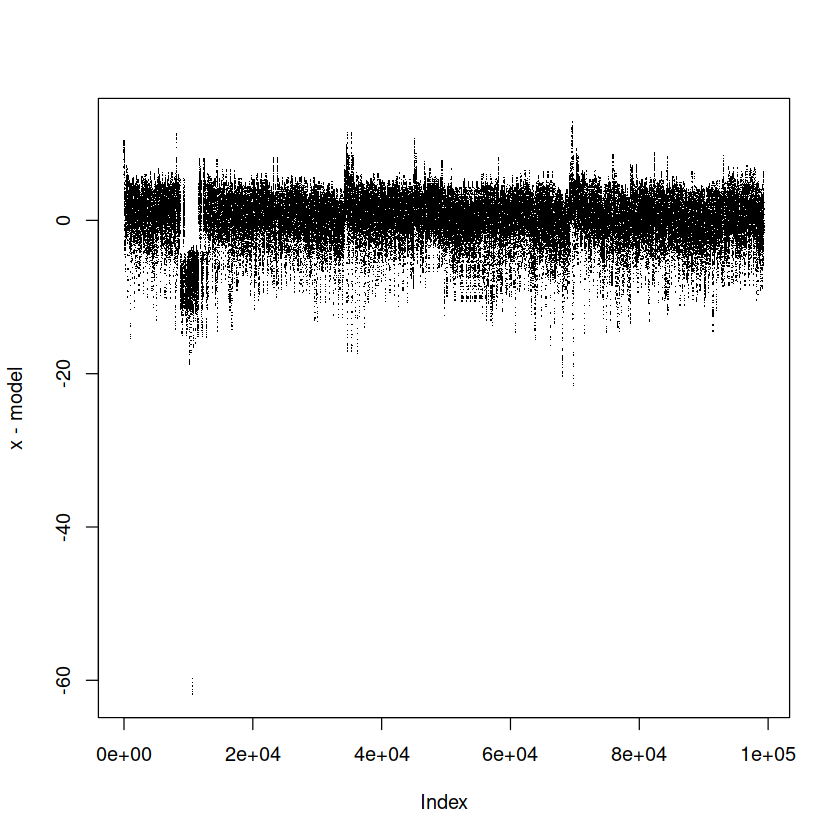

In [38]:
plot(x - model, type="p", pch=".")

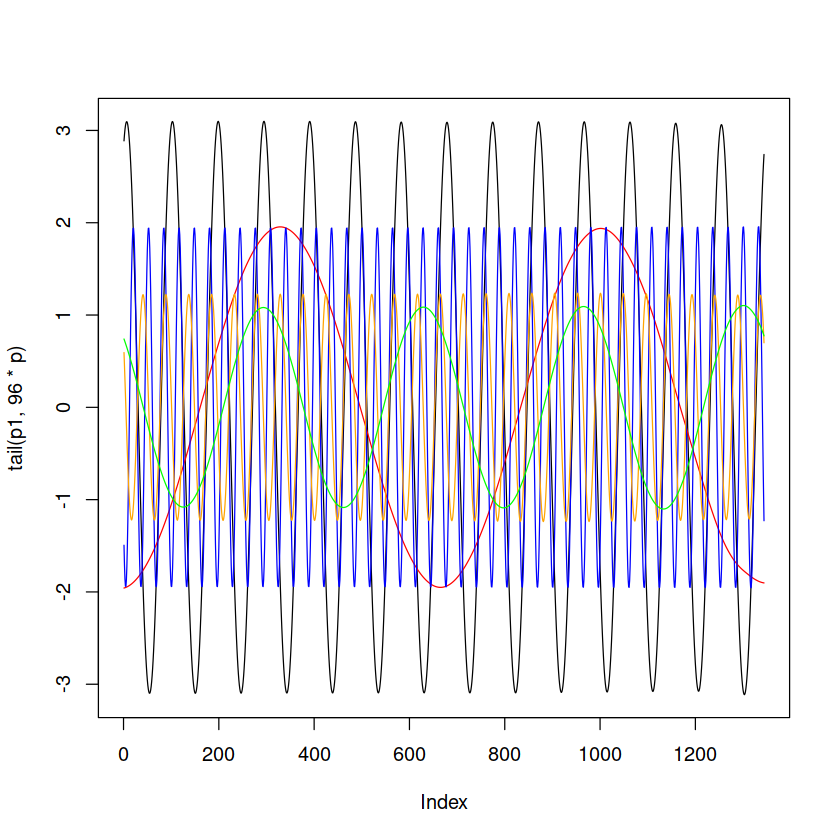

In [41]:
p <- 14
with(recon, {
  plot(tail(p1, 96*p), type="l")
  lines(tail(p2, 96*p), type="l", col="red")
  lines(tail(p3, 96*p), type="l", col="blue")
  lines(tail(p4, 96*p), type="l", col="orange")
  lines(tail(p5, 96*p), type="l", col="green")
})

In [42]:
days <- seq.Date(as.Date("2016-01-01", tz="UTC"), as.Date("2018-10-31", tz="UTC"), "1 day")
dates <- rep(days, each=96)
intervals <- rep(1:96, length(days))
day <- factor(weekdays(dates), levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
msm <- rep(1:96 * 15, length(days))
month <- factor(months(dates), levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
x.fixed <- data.frame(date=dates, day=day, month=month, interval=intervals, msm=msm, speed_mean=x)
tail(x.fixed)

,date,day,month,interval,msm,speed_mean
99355,2018-10-31,Wednesday,October,91,1365,62.66
99356,2018-10-31,Wednesday,October,92,1380,62.03
99357,2018-10-31,Wednesday,October,93,1395,61.97
99358,2018-10-31,Wednesday,October,94,1410,60.71
99359,2018-10-31,Wednesday,October,95,1425,60.98
99360,2018-10-31,Wednesday,October,96,1440,60.30


In [43]:
# seasonal adjustment (trend + winter/summer cycle + inter-week) - winter season now gone
x.fixed$sa <- x.fixed$speed_mean - (recon$Trend + recon$p2)
# model
x.fixed$model <- with(recon, Trend+p1+p2+p3+p4+p5)
# parts of model
x.fixed$trend <- recon$Trend # just the trend
tail(x.fixed, 20)

,date,day,month,interval,msm,speed_mean,sa,model,trend
99341,2018-10-31,Wednesday,October,77,1155,59.26,1.840009,58.19831,59.28344
99342,2018-10-31,Wednesday,October,78,1170,60.66,3.242903,58.92834,59.28357
99343,2018-10-31,Wednesday,October,79,1185,62.31,4.895705,59.63487,59.28369
99344,2018-10-31,Wednesday,October,80,1200,63.48,6.068426,60.30031,59.28381
99345,2018-10-31,Wednesday,October,81,1215,63.76,6.351070,60.90849,59.28393
99346,2018-10-31,Wednesday,October,82,1230,63.74,6.333634,61.44525,59.28404
99347,2018-10-31,Wednesday,October,83,1245,63.71,6.306109,61.89889,59.28415
99348,2018-10-31,Wednesday,October,84,1260,63.58,6.178485,62.26059,59.28425
99349,2018-10-31,Wednesday,October,85,1275,63.69,6.290747,62.52462,59.28436
99350,2018-10-31,Wednesday,October,86,1290,63.47,6.072882,62.68855,59.28447


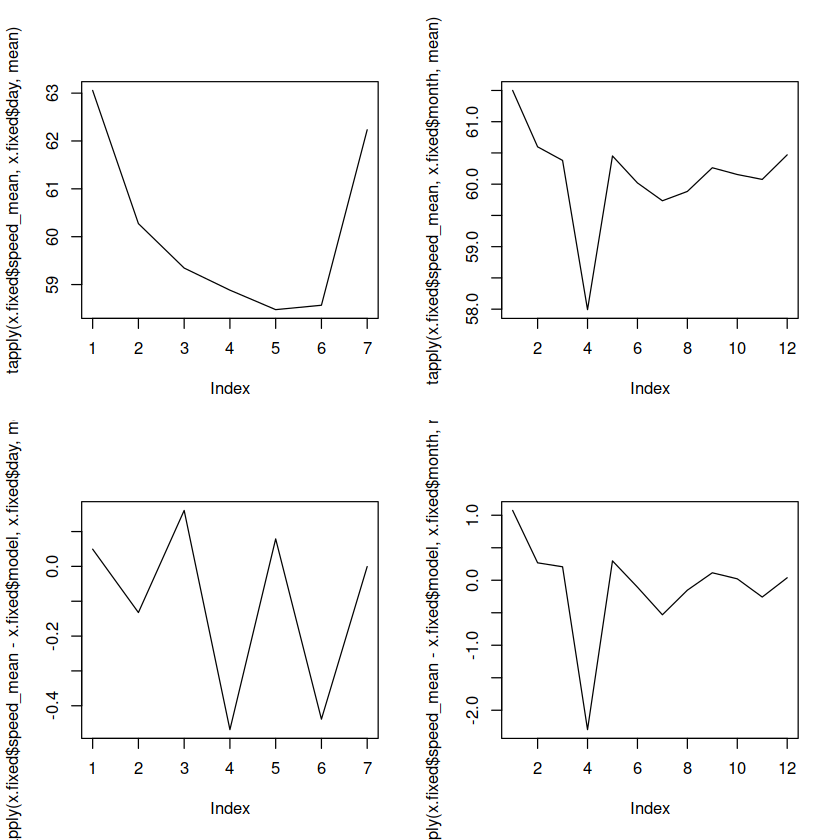

In [45]:
par(mfrow=c(2,2))
plot(tapply(x.fixed$speed_mean,  x.fixed$day, mean), type="l")
plot(tapply(x.fixed$speed_mean,  x.fixed$month, mean), type="l")
plot(tapply(x.fixed$speed_mean - x.fixed$model, x.fixed$day, mean), type="l")
plot(tapply(x.fixed$speed_mean - x.fixed$model, x.fixed$month, mean), type="l")

In [46]:
write.csv(x.fixed, "speed_mean_sa_2016-2018.csv", row.names=F, quote=F)